In [ ]:
%pip install --upgrade pip setuptools wheel

In [1]:
%pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pycaret.time_series import TSForecastingExperiment
import pandas as pd
import numpy as np
import matplotlib

In [3]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
def pycaret(dataset, test_size, target):

    dataset.index = range(0, dataset.shape[0])
    train, test = dataset.head(int(dataset.shape[0]-test_size)), dataset.tail(test_size)
    exp_auto = TSForecastingExperiment()
    exp_auto.setup(
        data=train, target=target,
        enforce_exogenous=True,
        numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
        session_id=42, 
    )

    real = test[target]
    
    best = exp_auto.compare_models(verbose=True)
    print(best)
    best_model = exp_auto.tune_model(
                        best,
                        choose_better=True,
                        n_iter=50,
                        fold=3,
                        search_algorithm="random",
                        tuner_verbose=True,
                    )
    
    forecast = exp_auto.predict_model(best_model, fh=30)

    return real.values, forecast.values.flatten()

In [5]:
# Example: Create a simple time series dataset
# Your dataset should have a column for the target variable and optionally exogenous variables
data = pd.DataFrame({
    'date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'sales': [i + (i * 0.1) + np.random.normal(0, 2) for i in range(100)],  # target
    'promotion': [1 if i % 7 == 0 else 0 for i in range(100)]  # exogenous variable
})

# Set date as index if you have a datetime index (though the function uses range index)
# data = data.set_index('date')

# Call the function
real_values, forecast_values = pycaret(
    dataset=data,        # Your DataFrame
    test_size=30,        # Number of points to use for testing (last 30 points)
    target='sales'       # Name of the column to forecast
)

print("Real values:", real_values)
print("Forecast values:", forecast_values)

,Description,Value
0,session_id,42
1,Target,sales
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(70, 3)"
5,Transformed data shape,"(70, 3)"
6,Transformed train set shape,"(69, 3)"
7,Transformed test set shape,"(1, 3)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
croston,Croston,4.2569,3.3771,10.2434,10.2434,0.1398,0.1505,0.3133


Croston()


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,65.0000,1.0422,0.8258,2.5168,2.5168,0.0346,0.0352
1,66.0000,0.3592,0.2847,0.8631,0.8631,0.0122,0.0122
2,67.0000,1.9019,1.5113,4.5655,4.5655,0.0604,0.0623
Mean,nan,1.1011,0.8739,2.6485,2.6485,0.0357,0.0365
SD,nan,0.6312,0.5019,1.5144,1.5144,0.0197,0.0205


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.3s finished


Real values: [ 76.70977408  76.66133882  78.32904649  80.6345217   80.91347264
  85.90774362  85.74733061  86.55450448  87.23128269  83.04908471
  89.62482644  89.97538367  90.14497425  91.01471755  90.98889098
  93.49069157  93.55700878  94.20935848  98.10407432  97.56700597
  98.23796528 104.1398142  102.39544006 104.03748955 107.55829718
 103.48115011 102.22973871 105.8506914  105.5116558  107.22546915]
Forecast values: [73.1669 73.1669 73.1669 73.1669 73.1669 73.1669 73.1669 73.1669 73.1669
 73.1669 73.1669 73.1669 73.1669 73.1669 73.1669 73.1669 73.1669 73.1669
 73.1669 73.1669 73.1669 73.1669 73.1669 73.1669 73.1669 73.1669 73.1669
 73.1669 73.1669 73.1669]


,Description,Value
0,session_id,42
1,Target,sales
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(170, 3)"
5,Transformed data shape,"(170, 3)"
6,Transformed train set shape,"(169, 3)"
7,Transformed test set shape,"(1, 3)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.5769,0.4774,9.3229,9.3229,0.0816,0.0788,0.0333
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.5776,0.4779,9.3252,9.3252,0.0847,0.0787,0.0300
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6373,0.5272,10.2856,10.2856,0.0947,0.0860,0.0267
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6505,0.5382,10.5034,10.5034,0.0954,0.0878,0.0300
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.6542,0.5412,10.5623,10.5623,0.0960,0.0882,0.0733
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.6546,0.5416,10.5698,10.5698,0.0960,0.0883,0.0267
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.6620,0.5476,10.6878,10.6878,0.0972,0.0892,0.0567
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.6621,0.5478,10.6907,10.6907,0.0972,0.0892,0.3633
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.6622,0.5478,10.6926,10.6926,0.0972,0.0892,0.0600
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.6638,0.5491,10.7175,10.7175,0.0974,0.0894,0.3700


BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                   n_jobs=1)],
                    regressor=AdaBoostRegressor(random_state=42), sp=2,
                    window_length=2)


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,165.0000,0.4900,0.4057,7.9449,7.9449,0.0633,0.0614
1,166.0000,0.0328,0.0272,0.5320,0.5320,0.0041,0.0041
2,167.0000,1.2203,1.0092,19.6792,19.6792,0.1870,0.1710
Mean,nan,0.5811,0.4807,9.3854,9.3854,0.0848,0.0788
SD,nan,0.4891,0.4044,7.8829,7.8829,0.0762,0.0693


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.3s finished


MAE: 70.46
RMSE: 91.01


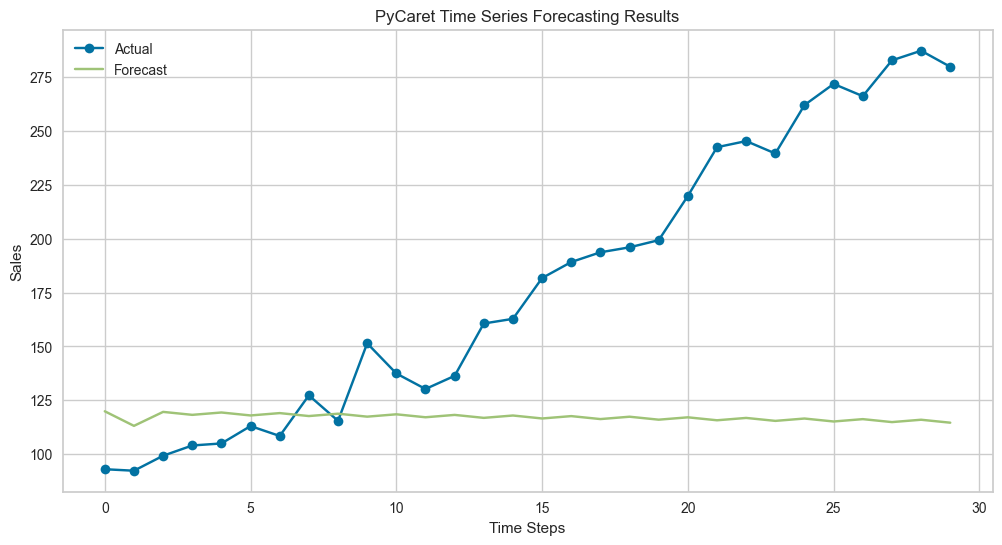

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
n_periods = 200
data = pd.DataFrame({
    'sales': np.sin(np.linspace(0, 20, n_periods)) * 100 + np.random.normal(0, 10, n_periods) + 200,
    'promotion': np.random.choice([0, 1], size=n_periods, p=[0.8, 0.2]),
    'holiday': np.random.choice([0, 1], size=n_periods, p=[0.9, 0.1])
})

# Run the forecasting experiment
real, forecast = pycaret(
    dataset=data,
    test_size=30,
    target='sales'
)

# Evaluate the results
mae = mean_absolute_error(real, forecast)
rmse = np.sqrt(mean_squared_error(real, forecast))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(real, label='Actual', marker='o')
plt.plot(forecast, label='Forecast', marker='x')
plt.title('PyCaret Time Series Forecasting Results')
plt.xlabel('Time Steps')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()